Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Ignoring the warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [3]:
data_1=pd.read_csv(r"C:\Users\surya pavan\D\Deliveroo_Hiring_-_Test_for_Machine_Learning_Engineering\Deliveroo Hiring - Test for Machine Learning Engineering\orders.csv.gz")
data_2=pd.read_csv(r"C:\Users\surya pavan\D\Deliveroo_Hiring_-_Test_for_Machine_Learning_Engineering\Deliveroo Hiring - Test for Machine Learning Engineering\restaurants.csv.gz")

In both the files, restaurant_id is common.

We are merging the files on restauramt_id feature

In [4]:
df=pd.merge(data_1, data_2, on = ['restaurant_id'])

Checking the data types of the features

In [5]:
df.dtypes

order_acknowledged_at     object
order_ready_at            object
order_value_gbp          float64
restaurant_id              int64
number_of_items            int64
prep_time_seconds          int64
country                   object
city                      object
type_of_food              object
dtype: object

Here, "order_acknowledged_at" and "order_ready_at" features are in object type.

We have to convert to datetime object

In [6]:
df['order_acknowledged_at']=pd.to_datetime(df['order_acknowledged_at'],utc=True)
df['order_ready_at']=pd.to_datetime(df['order_ready_at'],utc=True)

Validating the features that are converted

In [7]:
type(df['order_acknowledged_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

checking, is there any null values present in the dataset

In [8]:
df.isnull().sum()

order_acknowledged_at    0
order_ready_at           0
order_value_gbp          0
restaurant_id            0
number_of_items          0
prep_time_seconds        0
country                  0
city                     0
type_of_food             0
dtype: int64

Thera re no null values present in the data

Checking for duplicated values

In [9]:
df.duplicated().sum()

0

There are no duplicated values present

In [10]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food
0,2015-06-01 11:28:28.952789+00:00,2015-06-01 13:12:09.474896+00:00,59.90,1326,2,6220,UK,London,burritos
1,2015-06-06 16:06:24.434807+00:00,2015-06-06 16:16:27.520253+00:00,24.00,1326,8,603,UK,London,burritos
2,2015-06-08 13:56:15.503204+00:00,2015-06-08 14:03:39.397496+00:00,15.25,1326,3,443,UK,London,burritos
3,2015-06-12 14:12:20.497925+00:00,2015-06-12 14:23:30.064683+00:00,28.05,1326,8,669,UK,London,burritos
4,2015-06-01 12:07:10.794050+00:00,2015-06-01 13:02:25.104517+00:00,56.30,255,7,3314,UK,London,chinese


Sorting the data based on "order_acknowledged_at"

In [11]:
df=df.sort_values(by='order_acknowledged_at')
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

In [12]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,UK,London,healthy
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,UK,London,healthy
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,UK,London,american
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,UK,London,healthy
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,UK,London,dessert


Extracting date from "order_acknowledged_at".

In [13]:
df['date_of_order']=pd.to_datetime(df['order_acknowledged_at'], utc=True,
                                         format='%Y-%m-%d %H:%M:%S').dt.date
df['date_of_order']=pd.to_datetime(df['date_of_order'])

Extracting time of order and order ready time from "order_acknowledged_at" and "order_ready_at"

In [14]:
df['acknow_hr']=pd.to_datetime(df['order_acknowledged_at'], utc=True,
                                     format='%Y-%m-%d %H:%M:%S').dt.hour

In [15]:
df['ready_hr']=pd.to_datetime(df['order_ready_at'], utc=True,
                                     format='%Y-%m-%d %H:%M:%S').dt.hour

In [16]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,UK,London,healthy,2015-06-01,9,13
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,UK,London,healthy,2015-06-01,10,12
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,UK,London,american,2015-06-01,10,12
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,UK,London,healthy,2015-06-01,10,12
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,UK,London,dessert,2015-06-01,11,12


In [17]:
df['city'].nunique()

22

22 unique cities are there in dataset

In [18]:
df['type_of_food'].nunique()

83

There are 83 diffterent types of food present in data

In [19]:
#Extracting the day of the order

df['DAY'] = df['date_of_order'].dt.day_name()

In [20]:
#Extracting the day number in a weak, when the order was placed

df['DAY_NUMBER']=df['date_of_order'].dt.dayofweek

Shape of datset

In [21]:
df.shape

(32394, 14)

There are 32,394 rows and 14 columns

## Exploratory Data Analysis

Distribution of cuisines

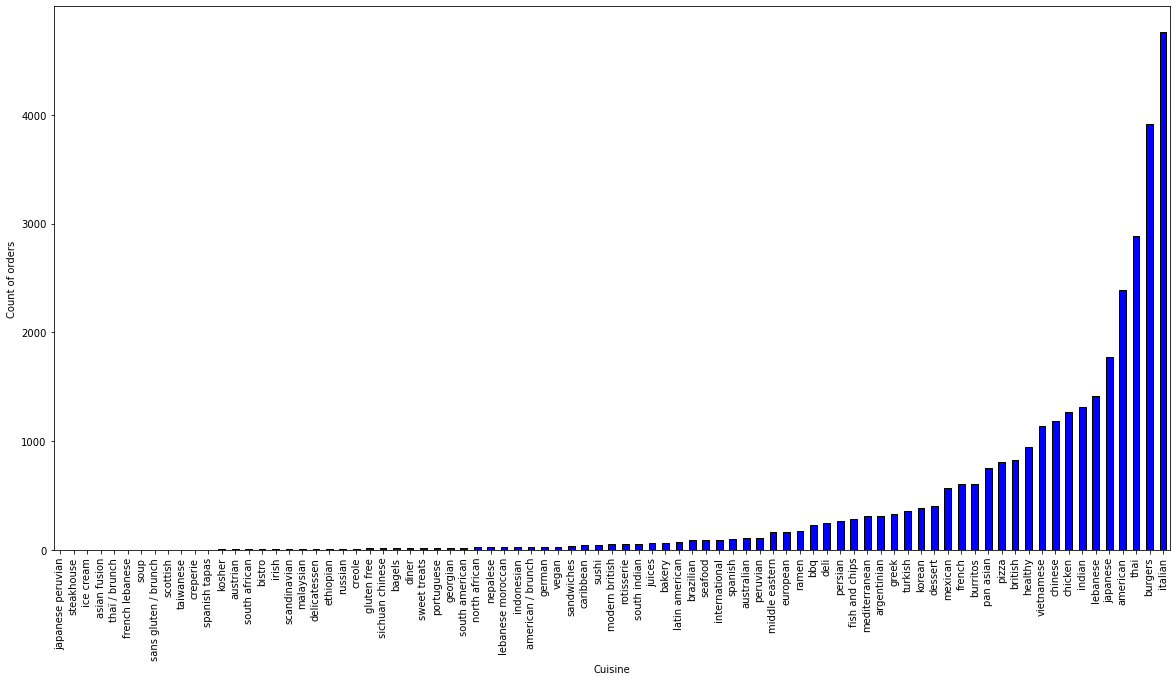

In [22]:
plt.figure(figsize=(20,10))
df.groupby('type_of_food').count()['order_value_gbp'].sort_values().plot(kind='bar',color='blue',edgecolor='k');
plt.xlabel('Cuisine')
plt.ylabel('Count of orders');

Italian,burgers,thai,american and japanese has been ordered the most, accounts for almost 50% of the total number of orders.

From the given dataset, let's draw some useful insights. knowing at what time, maximum number of orders booking.

In [23]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY,DAY_NUMBER
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,UK,London,healthy,2015-06-01,9,13,Monday,0
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,UK,London,healthy,2015-06-01,10,12,Monday,0
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,UK,London,american,2015-06-01,10,12,Monday,0
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,UK,London,healthy,2015-06-01,10,12,Monday,0
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,UK,London,dessert,2015-06-01,11,12,Monday,0


In [24]:
timings=df['acknow_hr'].value_counts().sort_values(ascending=False).reset_index()
timings.head()

,index,acknow_hr
0,19,6939
1,20,5882
2,18,4376
3,21,3350
4,12,2250


<AxesSubplot:xlabel='index', ylabel='acknow_hr'>

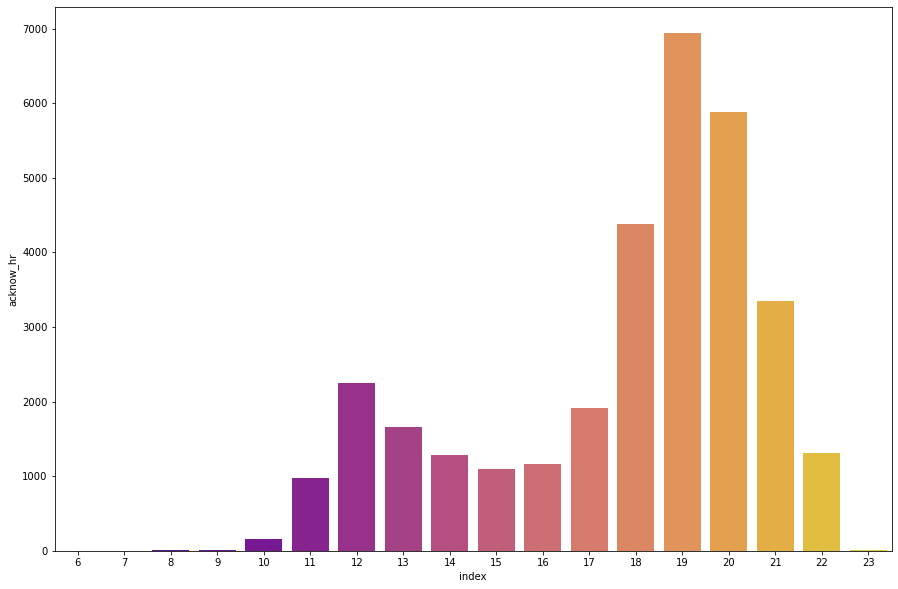

In [25]:
plt.rcParams['figure.figsize']=(15,10)
sns.barplot(x=timings['index'],y=timings['acknow_hr'],data=timings,palette='plasma')

 we can see that, at night 7PM, most orders are placed and at 6PM,8PM,9PM also, more orders are booking.

 let's know from which city many of the orders are booking

In [26]:
cities_dist=df['city'].value_counts().sort_values(ascending=False).reset_index()
cities_dist.head()

,index,city
0,London,25481
1,Paris,2032
2,Manchester,964
3,Brighton,652
4,Oxford,546


<AxesSubplot:xlabel='index', ylabel='city'>

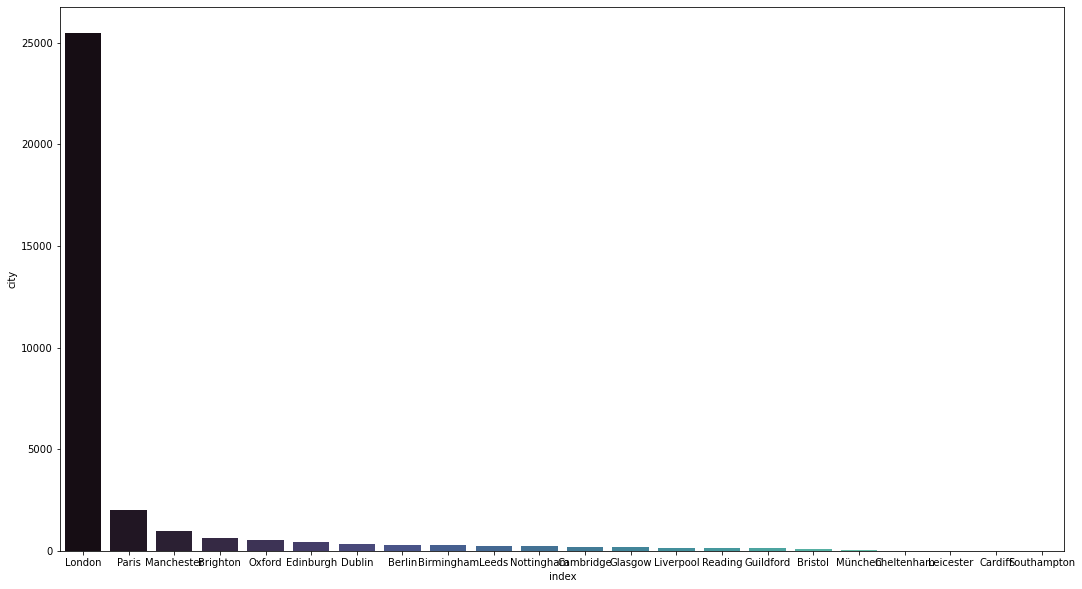

In [27]:
plt.rcParams['figure.figsize']=(18,10)
sns.barplot(x=cities_dist['index'],y=cities_dist['city'],data=cities_dist,palette='mako')

Around 76% of the orders are booking from london. also know, from london which restaurant, which food is mostly ordering.

Orders booking based on week

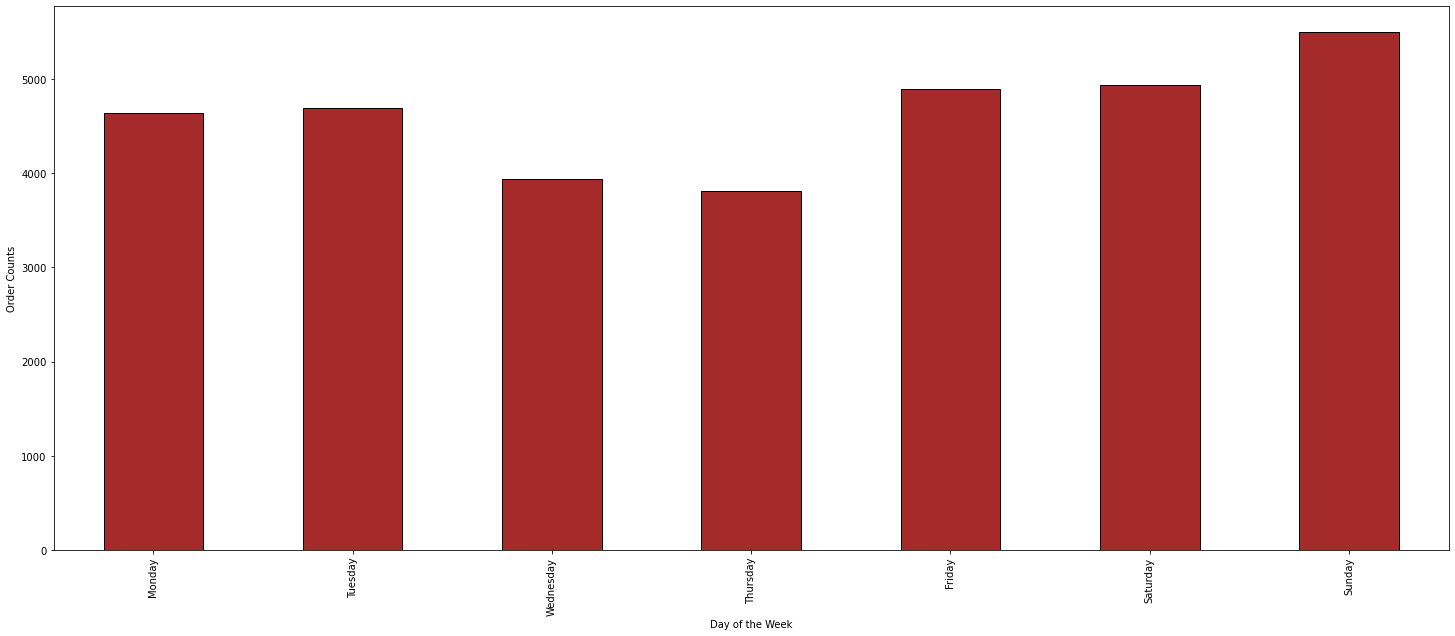

In [28]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(25,10))
df.groupby('DAY').count().reindex(days)['date_of_order'].plot(kind='bar',color='brown',edgecolor='k')
plt.xlabel('Day of the Week')
plt.ylabel('Order Counts');

most orders are occuring on Sunday.

Distribution of food preparation time

Text(0, 0.5, 'Counts')

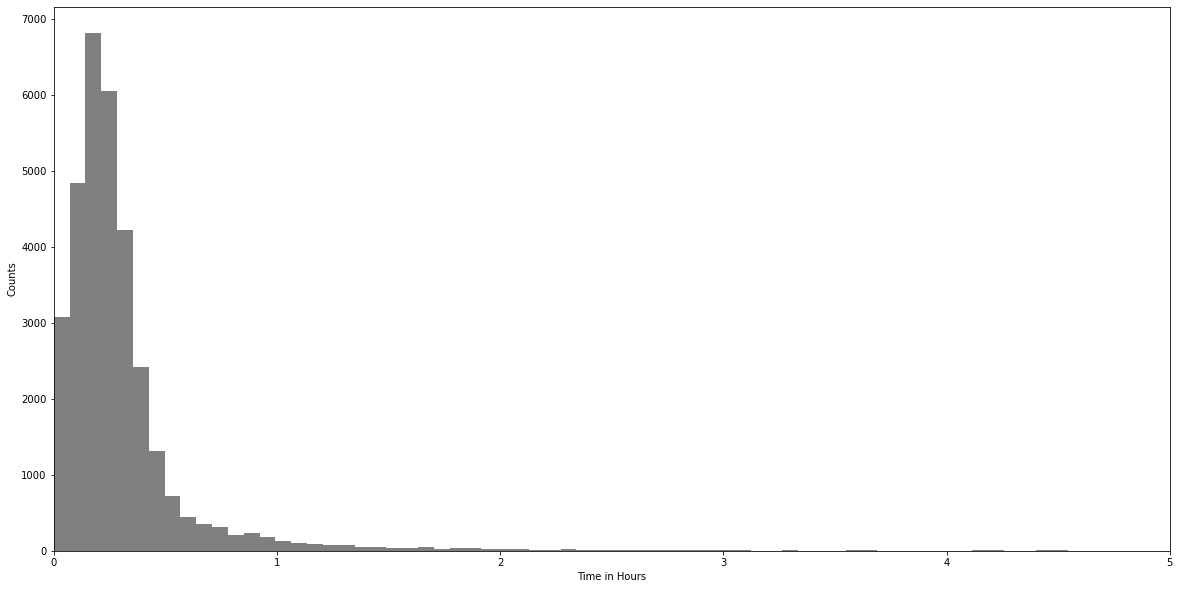

In [29]:
plt.figure(figsize=(20,10))
prep_time=pd.DataFrame(df['prep_time_seconds']/3600)
plt.hist(prep_time,bins=1000,color='grey');
plt.xlim(0,5)
plt.xlabel("Time in Hours")
plt.ylabel("Counts")

Preparation of food takes place less than an hour for maximum number of orders.

Time required to prepare different types of food

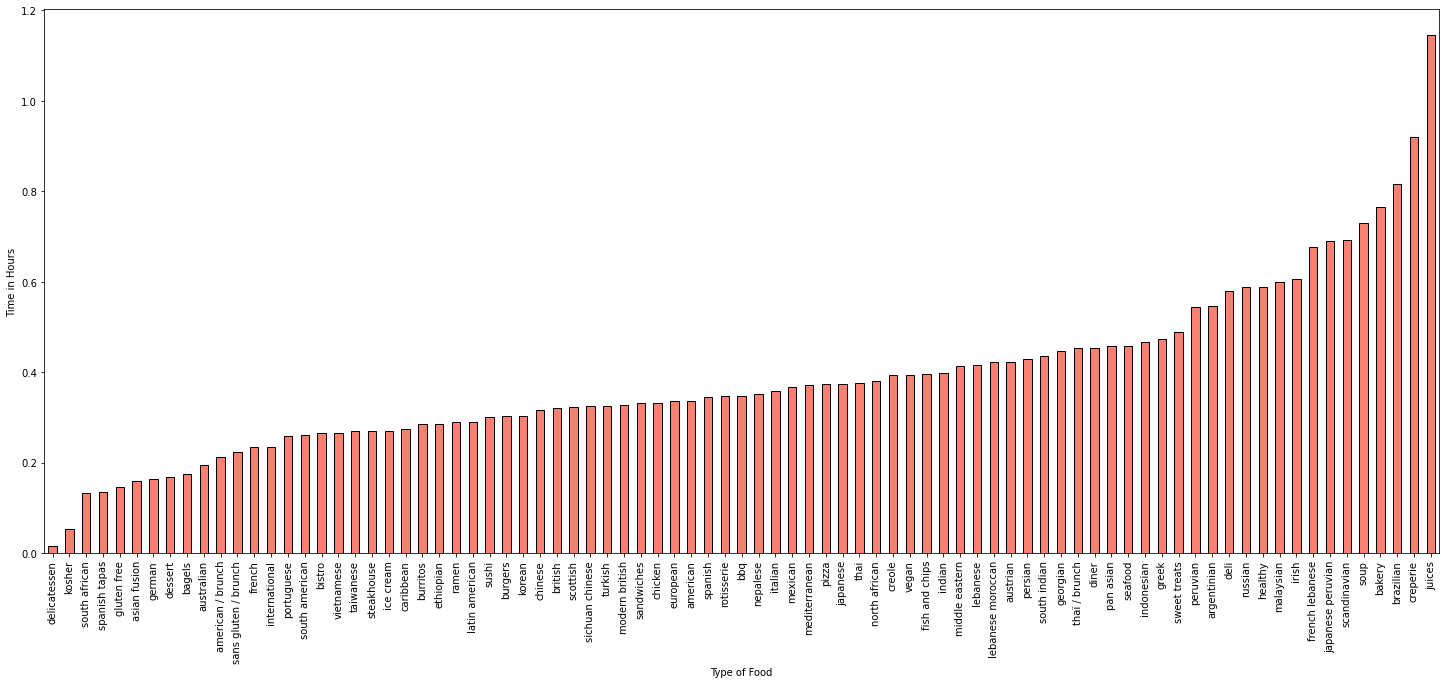

In [30]:
plt.figure(figsize=(25,10))
orders_time=pd.DataFrame(df.groupby('type_of_food').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
orders_time['Time(Hrs)']=orders_time['prep_time_seconds']/3600
orders_time['Time(Hrs)'].plot(kind='bar',color='salmon',edgecolor='k');
plt.xlabel('Type of Food')
plt.ylabel('Time in Hours');

Juices require the most time to prepare. In real scenario, juices doesn't take much time to prepare.May be restarants are giving more time to food to prepare than preparing juices

Distribution of time to prepare orders in a weak

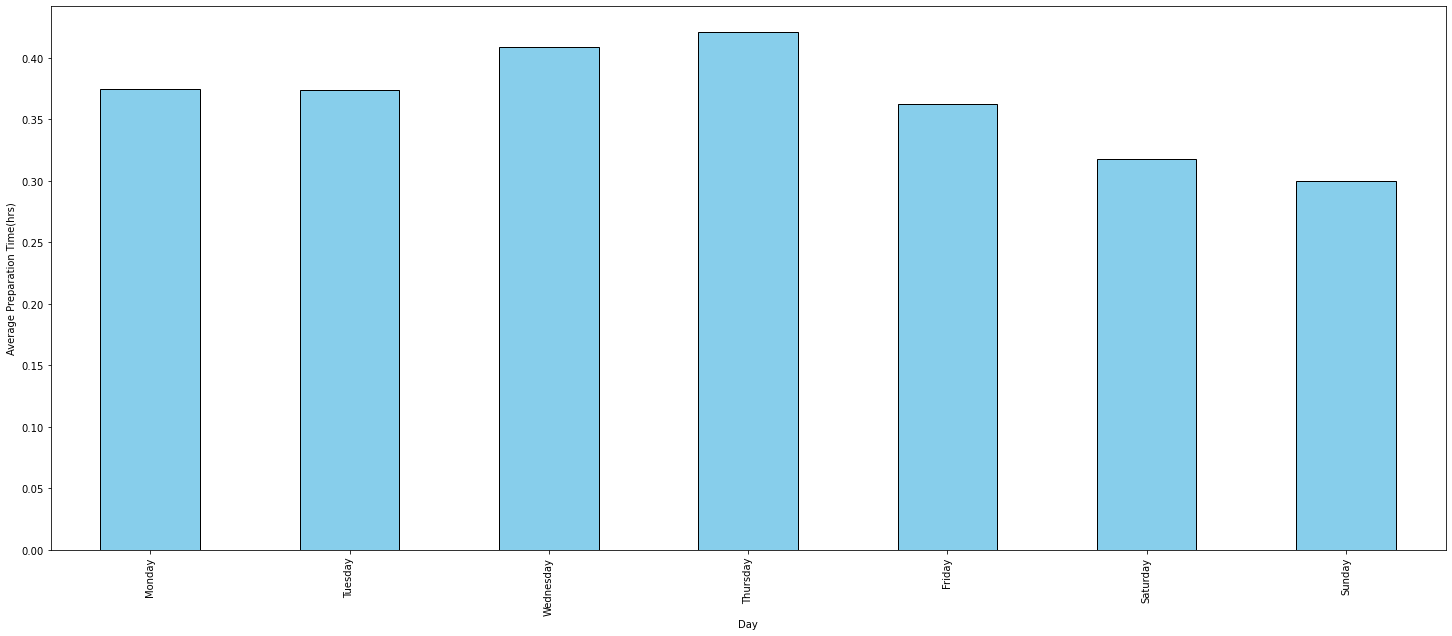

In [31]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(25,10))
day_time=df.groupby('DAY').mean().reindex(days)
day_time['Time_in_hours']=day_time['prep_time_seconds']/3600
day_time['Time_in_hours'].plot(kind='bar',color='skyblue',edgecolor='k')
plt.xlabel('Day')
plt.ylabel('Average Preparation Time(hrs)');

Here, we can get a good insight. That more number of orders are booking on weekends(saturday and sunday), So more time to be taken to prepare the food.

But, Wednesday and Thursday are the days that takes more time to prepare the food in hours.

Which indicates, chefs are reduced on weekdays as, orders are not much high. May be the chefs are hired on weekends to work as there will be more orders


Distribution of Value of order

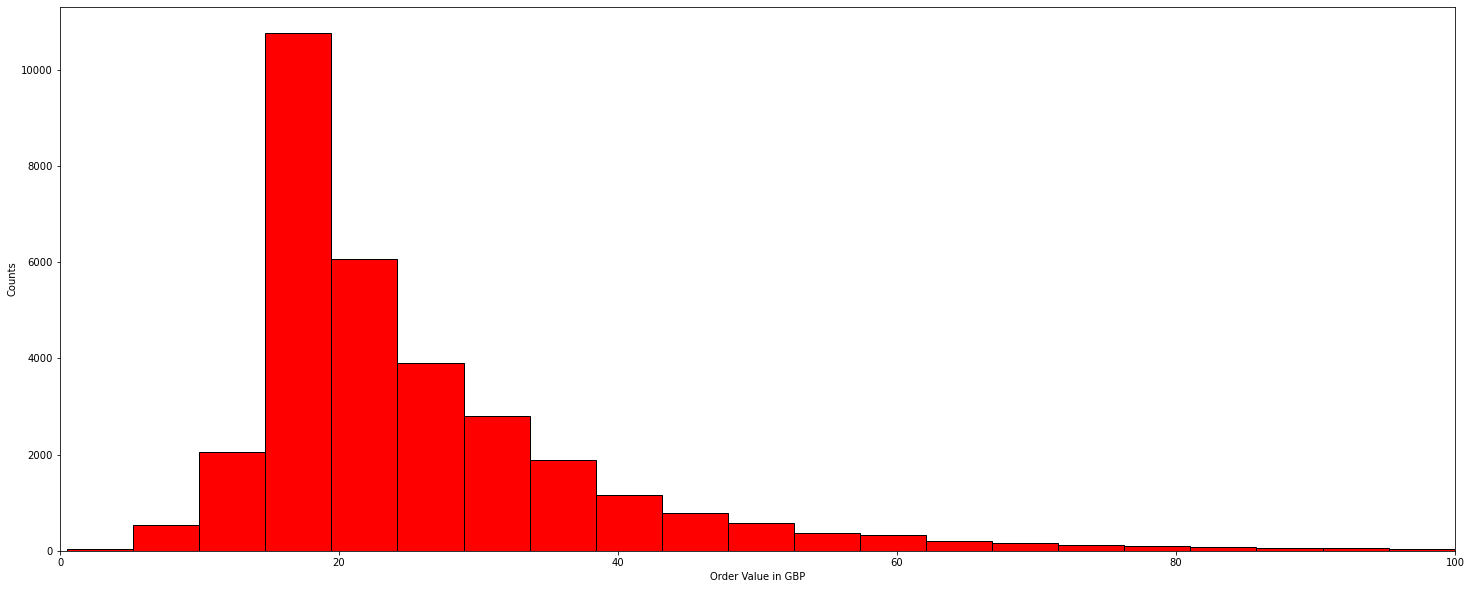

In [32]:
plt.figure(figsize=(25,10))
plt.hist(df['order_value_gbp'],bins=150,color='red',edgecolor='black');
plt.xlim(0,100)
plt.ylabel('Counts')
plt.xlabel('Order Value in GBP');

Most orders are in the price range of 20-40 GBP

In [33]:
countries=df.groupby('country').count()['date_of_order'].sort_values().reset_index()
countries.head()

,country,date_of_order
0,Germany,320
1,Ireland,353
2,France,2032
3,UK,29689


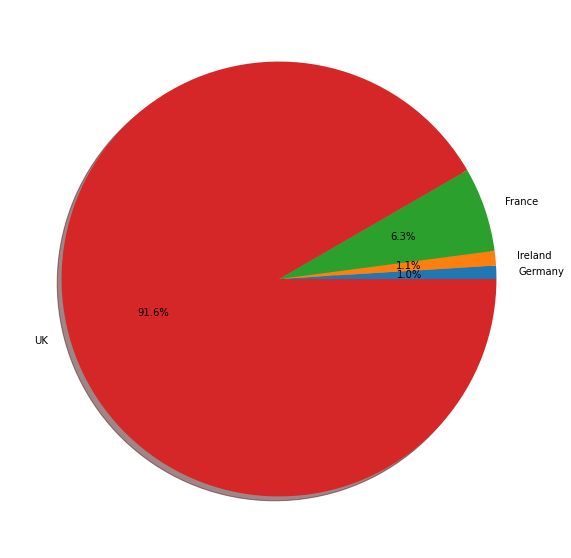

In [34]:
plt.pie(x=countries['date_of_order'],autopct="%1.1f%%",shadow=True,labels=["Germany","Ireland","France","UK"])
plt.show()

Most number of orders are placing from UK.

Average time for food preparation time based on cities

In [35]:
city=pd.DataFrame(df.groupby('city').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
city['Time(hours)']=city['prep_time_seconds']/3600

city.head()

,prep_time_seconds,Time(hours)
city,,
Cardiff,846.800000,0.235222
Paris,856.272638,0.237854
Berlin,927.016892,0.257505
Reading,1246.503937,0.346251
London,1289.325419,0.358146


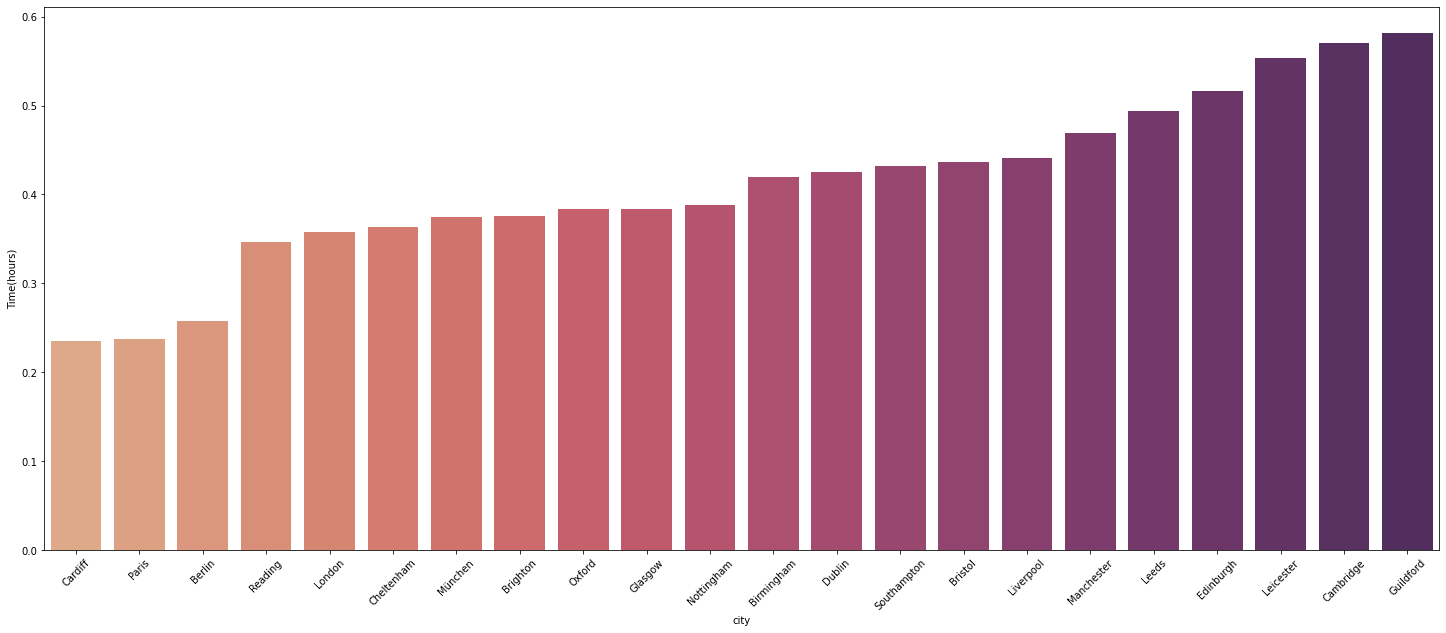

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(x=city.index,y=city['Time(hours)'],data=city,palette='flare')
plt.xticks(rotation=45)
plt.show()

In [37]:
df.reset_index(drop=True, inplace=True)
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY,DAY_NUMBER
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,UK,London,healthy,2015-06-01,9,13,Monday,0
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,UK,London,healthy,2015-06-01,10,12,Monday,0
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,UK,London,american,2015-06-01,10,12,Monday,0
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,UK,London,healthy,2015-06-01,10,12,Monday,0
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,UK,London,dessert,2015-06-01,11,12,Monday,0


## Feature Engineering

Now, We have to convert categorical values to numerical values by employing one-hot encoding or label encoding techniques

We have to map the countries with values, as there are only 4 unique countries present in the entire dataset

In [38]:
mapper={'UK':1,"France":2,"Ireland":3,"Germany":4}

In [39]:
df.replace({"country":mapper},inplace=True)
df.head()


,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY,DAY_NUMBER
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,1,London,healthy,2015-06-01,9,13,Monday,0
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,1,London,healthy,2015-06-01,10,12,Monday,0
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,1,London,american,2015-06-01,10,12,Monday,0
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,1,London,healthy,2015-06-01,10,12,Monday,0
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,1,London,dessert,2015-06-01,11,12,Monday,0


In [40]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY,DAY_NUMBER
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,1,London,healthy,2015-06-01,9,13,Monday,0
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,1,London,healthy,2015-06-01,10,12,Monday,0
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,1,London,american,2015-06-01,10,12,Monday,0
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,1,London,healthy,2015-06-01,10,12,Monday,0
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,1,London,dessert,2015-06-01,11,12,Monday,0


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
df['city']=le.fit_transform(df['city'])

In [44]:
df['type_of_food']=le.fit_transform(df['type_of_food'])

In [45]:
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY,DAY_NUMBER
0,2015-06-01 09:34:00.351812+00:00,2015-06-01 13:02:30.351682+00:00,15.10,2276,3,12509,1,14,32,2015-06-01,9,13,Monday,0
1,2015-06-01 10:22:56.328104+00:00,2015-06-01 12:23:57.316309+00:00,36.00,2276,4,7260,1,14,32,2015-06-01,10,12,Monday,0
2,2015-06-01 10:39:44.491932+00:00,2015-06-01 12:31:32.205864+00:00,48.00,604,1,6707,1,14,0,2015-06-01,10,12,Monday,0
3,2015-06-01 10:50:44.072478+00:00,2015-06-01 12:24:36.777383+00:00,35.45,1518,4,5632,1,14,32,2015-06-01,10,12,Monday,0
4,2015-06-01 11:02:23.080222+00:00,2015-06-01 12:48:49.660816+00:00,17.35,666,4,6386,1,14,21,2015-06-01,11,12,Monday,0


All the required features are converted to numerical values.

Now, We need to drop some columns, that are DAY,order_acknowledged_at and order_ready_at.

In [46]:
df.drop(columns={'DAY','order_acknowledged_at','order_ready_at'},inplace=True)

In [47]:
df.head()

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,date_of_order,acknow_hr,ready_hr,DAY_NUMBER
0,15.10,2276,3,12509,1,14,32,2015-06-01,9,13,0
1,36.00,2276,4,7260,1,14,32,2015-06-01,10,12,0
2,48.00,604,1,6707,1,14,0,2015-06-01,10,12,0
3,35.45,1518,4,5632,1,14,32,2015-06-01,10,12,0
4,17.35,666,4,6386,1,14,21,2015-06-01,11,12,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32394 entries, 0 to 32393
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_value_gbp    32394 non-null  float64       
 1   restaurant_id      32394 non-null  int64         
 2   number_of_items    32394 non-null  int64         
 3   prep_time_seconds  32394 non-null  int64         
 4   country            32394 non-null  int64         
 5   city               32394 non-null  int32         
 6   type_of_food       32394 non-null  int32         
 7   date_of_order      32394 non-null  datetime64[ns]
 8   acknow_hr          32394 non-null  int64         
 9   ready_hr           32394 non-null  int64         
 10  DAY_NUMBER         32394 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(7)
memory usage: 2.5 MB


No feature has the type as object

In [49]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xbg
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Splitting the dataset into training and testing.

Giving test size as 20% from entire data

In [50]:
x=df.drop(columns={'prep_time_seconds',"date_of_order"},axis=1)
y=df['prep_time_seconds']

In [51]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [52]:
X_train.head()

,order_value_gbp,restaurant_id,number_of_items,country,city,type_of_food,acknow_hr,ready_hr,DAY_NUMBER
7893,27.9,2746,3,1,14,39,19,19,0
22635,16.0,1274,3,1,14,82,14,14,0
25161,19.9,979,3,1,14,70,20,20,2
19514,26.0,1112,4,1,14,16,21,21,4
547,15.5,2729,4,1,14,82,19,19,0


Now, using pipeline, we are going to fit the taining data to the models and make the predictions.


In [53]:
lister=[LogisticRegression(max_iter=300),RandomForestRegressor(n_estimators=600),SVR(),xgb.XGBRFRegressor(n_estimators=500)]

<IPython.core.display.Javascript object>

In [57]:
for i in lister:
    pipe=Pipeline([('model',i)])
    pipe.fit(X_train,y_train)
    pipe_pred=pipe.predict(X_test)
    print(i,":")
    print('MAE:', metrics.mean_absolute_error(y_test, pipe_pred))
    print('MSE:', metrics.mean_squared_error(y_test, pipe_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pipe_pred)))

LogisticRegression(max_iter=300) :
MAE: 1152.6826670782527
MSE: 24875390.046457786
RMSE: 4987.523438186309
RandomForestRegressor(n_estimators=600) :
MAE: 661.4477751696363
MSE: 8842884.116620263
RMSE: 2973.698726606356
SVR() :
MAE: 792.3680108005667
MSE: 15587137.853073113
RMSE: 3948.054945548898
XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=500, n_jobs=8,
               num_parallel_tree=500, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) :
MAE: 730.1688909658699
MSE: 8682150.624820078
RMSE: 2946.5489347404496


Comparing the results of metrics for all algorithms, Xgboost algorithm gives best results.

We also observe that, the dataset is imbalanced.